In [1]:
# In questa prima cella si importano anche le librerie necessarie:
import numpy as np
from scipy import optimize as sop
from matplotlib.ticker import EngFormatter
import matplotlib.pyplot as plt
import pandas as pd

#Altri dati utili per i plot
titlefontsize, labelfontsize, tickfontsize=20, 16, 14
markersize, linewidth = 6, 1.5

# Indice di rifrazione, R e T
### Struttura dell'esperienza
In questa esperienza si vogliono ricavare le misure dei coefficienti di riflessione e trasmissione in funzione dell'angolo, sia in polarizzazione $\sigma$ che in polarizzazione $\pi$. Per ricavare questi valori si misura la tensione misurata su un fotodiodo con un multimetro: essendo il fotodiodo polarizzato in inversa, la risposta sarà lineare rispetto all'intensità: $V \propto I$. Quindi, dato che $R = I_r/I_i$ e $T = I_t/I_i$ (dove $I_r$ è l'intensità riflessa, $I_t$ quella trasmessa e $I_i$ quella incidente), misurando le tensioni si ottengono i valori corretti dei coefficienti. L'intensità incidente si ottiene facendo una misura a vuoto, cioè senza il campione di cui si vogliono misurare $R$ e $T$.

Come sorgente si è utilizzato un led arancione ($\sim 600\text{ nm}$) alimentato da un generatore di funzioni in onda quadra. Si è prestata attenzione a non alimentarlo oltre la corrente limite specificata dal produttore ($I_{max} = 30 \text{ mA}$).

Di seguito si riporta l'immagine del setup sperimentale per le misure in riflessione (fonte: slide del corso).
<br><center><img src="img/LED_rifl.png" width="700"/></center><br>



Dalle misure effettuate, per ogni campione, si possono ricavare:
* Angolo di Brewster (o pseudo-Brewster)
* Grado di polarizzazione
* Indice di rifrazione (approssimativamente, si è provato sia fittando tutta la curva e ricavandolo come parametro di fit, sia dall'angolo di brewster stimando nella maniera migliore possibile il minimo della curva di $R_\pi$.

Sono state effettuate misure per diversi materiali:
* vetro ($SiO_2$): sia trasmissione che riflessione
* Silicio: solo riflessione
* Oro: Solo riflessione (in questo caso, date le dimensioni ridotte del campione, non si è riusciti ad arrivare all'angolo di pseudo-brewster perché il raggio di luce incideva in parte fuori dal campione)

## Vetro
Di seguito si riportano dati e grafici relativi al vetro. I dati vengono letti direttamente da CSV e si riporta il dataframe ottenuto. La prima riga contiene le misure a vuoto. Per completezza si plotta anche l'assorbimento, dato da $A = 1 - R - T$

In [2]:
data = pd.read_csv("data/Vetro.csv", delimiter=";")
print(data)

theta = data["theta"].to_numpy()[1:]
V_trasm_S = data["T_S"].to_numpy()
V_trasm_P = data["T_P"].to_numpy()
V_rifl_S = data["R_S"].to_numpy()
V_rifl_P = data["R_P"].to_numpy()

    theta   T_S   T_P   R_S   R_P
0     NaN  75.9  77.2  67.6  67.9
1     0.0  69.0  70.1   NaN   NaN
2     5.0  68.7  70.2   NaN   NaN
3    10.0  68.5  70.4   5.2   4.8
4    15.0  68.1  70.8   5.4   4.5
5    20.0  67.6  71.3   5.8   4.2
6    25.0  66.8  72.0   6.3   3.8
7    30.0  65.9  72.6   7.1   3.2
8    35.0  64.3  73.6   8.2   2.6
9    40.0  62.9  74.4   9.5   1.9
10   45.0  60.7  75.3  11.2   1.1
11   50.0  58.0  76.1  13.5   0.3
12   55.0  53.7  76.3  16.5   0.0
13   60.0  48.6  75.7  20.3   0.1
14   65.0  43.2  72.2  25.2   1.5
15   70.0  34.6  67.4  30.9   5.2
16   75.0  27.6  54.3  38.3  13.0
17   80.0  16.9  35.7  45.9  25.6


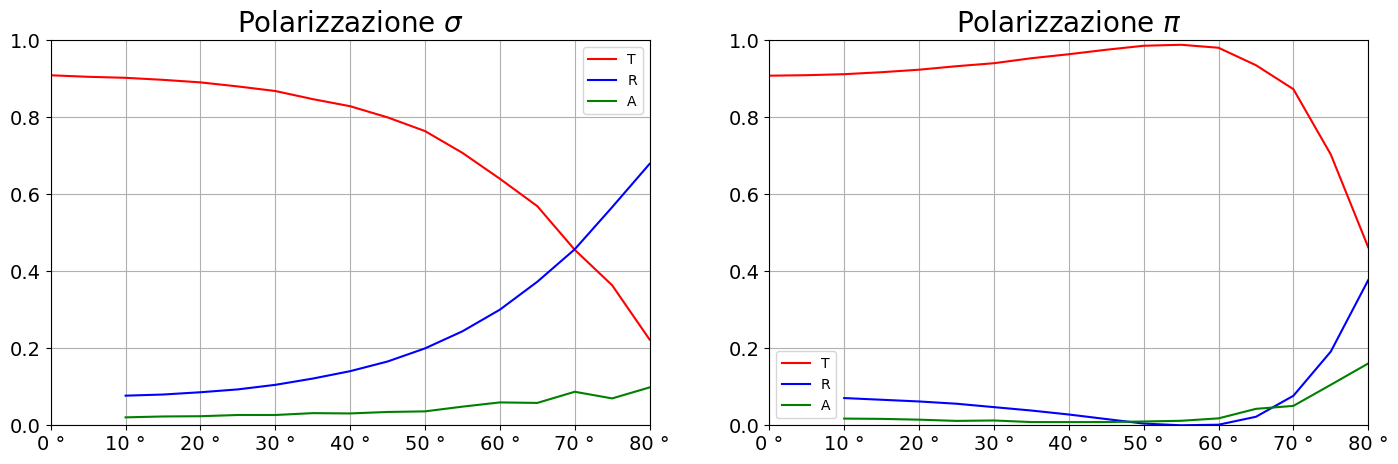

In [3]:
# In questa cella si procede al plot dei dati
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[17,5])

T_S = V_trasm_S[1:]/V_trasm_S[0]
R_S = V_rifl_S[3:]/V_rifl_S[0]
T_P = V_trasm_P[1:]/V_trasm_P[0]
R_P = V_rifl_P[3:]/V_rifl_P[0]
A_P = 1 - T_P[2:] - R_P
A_S = 1 - T_S[2:] - R_S

ax1.set_title('Polarizzazione $\sigma$', size=titlefontsize)
ax1.plot(theta, T_S, '-', markersize=markersize, linewidth=linewidth, color='red', label="T")
ax1.plot(theta[2:], R_S, '-', markersize=markersize, linewidth=linewidth, color='blue', label="R")
ax1.plot(theta[2:], A_S, '-', markersize=markersize, linewidth=linewidth, color='green', label="A")

ax1.xaxis.set_major_formatter(EngFormatter(unit=u"°"))
ax1.set_xlim(0,80)
ax1.set_ylim(0,1)
ax1.grid(True)
ax1.tick_params(labelsize=tickfontsize)
ax1.legend()

ax2.set_title('Polarizzazione $\pi$', size=titlefontsize)
ax2.plot(theta, T_P, '-', markersize=markersize, linewidth=linewidth, color='red', label="T")
ax2.plot(theta[2:], R_P, '-', markersize=markersize, linewidth=linewidth, color='blue', label="R")
ax2.plot(theta[2:], A_P, '-', markersize=markersize, linewidth=linewidth, color='green', label="A")

ax2.xaxis.set_major_formatter(EngFormatter(unit=u"°"))
ax2.set_xlim(0,80)
ax2.set_ylim(0,1)
ax2.grid(True)
ax2.tick_params(labelsize=tickfontsize)
ax2.legend();

I risultati principali ricavabili da queste misure sono due: l'andamento del grado di polarizzazione e l'angolo di Brewster.
* Riguardo al grado di polarizzazione, è sufficiente ricordarsi esso è dato da:
$$P_R = \left| \frac{R_{\sigma} - R_{\pi}}{R_{\sigma} + R_{\pi}} \right| \hspace{4cm} P_T = \left| \frac{T_{\sigma} - T_{\pi}}{T_{\sigma} + T_{\pi}}\right|$$
&emsp;&emsp;&emsp;&emsp;dove, rispettivamente, $P_R$ è il grado di polarizzazione per il fascio riflesso e $P_T$ per quello trasmesso.
* Per ricavare l'angolo di brewster, invece, si deve trovare il minimo della curva di $R_{\pi}$ e ricavare l'angolo corrispondente.

Si può inoltre dare una stima dell'indice di rifrazione. Si possono seguire diverse strade, in questa sede si è scelto un approccio più generale, ovvero si procederà al fit dei dati $R_{\pi}$, che permetterà di trovare:
* l'indice di rifrazione $n$, dato che è un parametro di fit
* l'angolo di Brewster, dato che si troverà il minimo della funzione fittata

La funzione di fit deve essere scelta con attenzione. In particolare, si può considerare una funzione di fit per la riflessione di un'onda polarizzata $\pi$ su singola faccia, come la seguente
$$R_{\pi} = \left[ \frac{ \left( \frac{n_2}{n_1} \right)^2 \cos\vartheta_i - \sqrt{ \left( \frac{n_2}{n_1} \right)^2 - \sin^2 \vartheta_i} }{\left( \frac{n_2}{n_1} \right)^2 \cos\vartheta_i + \sqrt{ \left( \frac{n_2}{n_1} \right)^2 - \sin^2 \vartheta_i}} \right]^2$$
dove $n_1$ è l'indice di rifrazione del primo mezzo, $n_2$ quello del secondo e $\vartheta_i$ l'angolo di incidenza.

Questa può essere semplificata considerando che $n_1 = 1$ dato che è l'indice di rifrazione dell'aria, quindi ponendo $n_2 = n$ (c'è solo un mezzo di cui si deve determinare l'indice di rifrazione) si ha:
$$R_{\pi} = \left[ \frac{ n^2 \cos\vartheta_i - \sqrt{ n^2 - \sin^2 \vartheta_i} }{n^2 \cos\vartheta_i + \sqrt{ n^2 - \sin^2 \vartheta_i}} \right]^2$$

Considerando infine la possibile presenza di un offset sull'angolo dovuta all'apparato sperimentale, si giunge a una funzione a due parametri di fit ($n$ e $\vartheta_0$):
$$R_{\pi} = \left[ \frac{ n^2 \cos\left(\vartheta_i + \vartheta_0\right) - \sqrt{ n^2 - \sin^2 \left(\vartheta_i + \vartheta_0\right)} }{n^2 \cos\left(\vartheta_i + \vartheta_0\right) + \sqrt{ n^2 - \sin^2 \left(\vartheta_i + \vartheta_0\right)}} \right]^2$$

Questa formula, però, non è accurata nel caso specifico del vetro: essendo un materiale in cui è prevalente la trasmissione, il fascio riflesso è dato anche dalla riflessione sulla seconda interfaccia vetro-aria. Per tenere conto di questa differenza, si è considerata la seguente formula (dove si intende $R = R_\pi$ come definito sopra):
$$\mathcal{R} = R + \frac{\left(1 - R^2\right)R \text{ e}^{-2\alpha d}}{1 - R^2 \text{ e}^{-2\alpha d}}$$
dove $\mathcal{R}$ è la riflettanza totale. Approssimando $\alpha d \ll 1$ si ha:
$$\mathcal{R} = R + \frac{\left(1 - R^2\right)R }{1 - R^2 }$$

In questo caso, dove il materiale è il vetro, si andrà ad usare quest'ultima fomula, che, combinata con l'espressione di $R_\pi$ fornirà i valori cercati di $n$ e di $\vartheta_0$. Di seguito si trovano le celle di codice per la definizione delle funzioni e per i grafici.


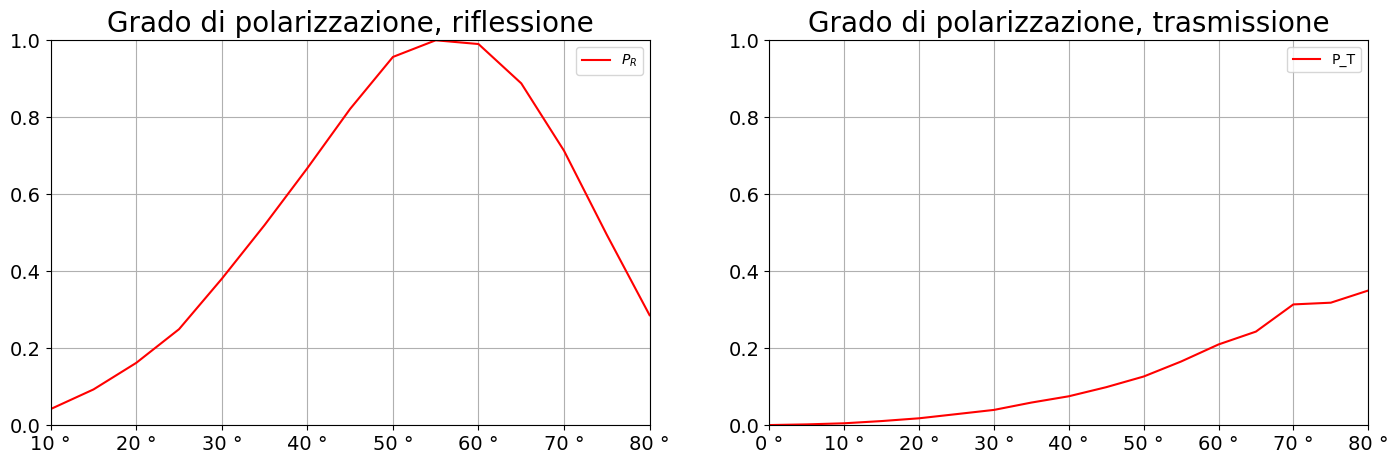

In [4]:
# In questa cella si procede al calcolo e al plot dei gradi di polarizzazione per la riflessione e la trasmissione
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[17,5])

P_R = np.abs((R_S - R_P) / (R_S + R_P))
P_T = np.abs((T_S - T_P) / (T_S + T_P))

ax1.set_title('Grado di polarizzazione, riflessione', size=titlefontsize)
ax1.plot(theta[2:], P_R, '-', markersize=markersize, linewidth=linewidth, color='red', label="$P_R$")
ax1.xaxis.set_major_formatter(EngFormatter(unit=u"°"))
ax1.set_xlim(10,80)
ax1.set_ylim(0,1)
ax1.grid(True)
ax1.tick_params(labelsize=tickfontsize)
ax1.legend()

ax2.set_title('Grado di polarizzazione, trasmissione', size=titlefontsize)
ax2.plot(theta, P_T, '-', markersize=markersize, linewidth=linewidth, color='red', label="P_T")
ax2.xaxis.set_major_formatter(EngFormatter(unit=u"°"))
ax2.set_xlim(0,80)
ax2.set_ylim(0,1)
ax2.grid(True)
ax2.tick_params(labelsize=tickfontsize)
ax2.legend();

In [5]:
# Questa funzione serve per fittare i dati di R in polarizzazione P per il vetro. È la formula per la riflessione su lamina sottile definita sopra
def reflectance_2_faces_P(theta, n, theta_0):
    # Qui si definisce R in maniera classica con le leggi di Fresnel
    R = ( ( n**2 * np.cos(theta+theta_0) - np.sqrt( n**2 - np.sin(theta+theta_0)**2 ) ) / ( n**2 * np.cos(theta+theta_0) + np.sqrt( n**2 - np.sin(theta+theta_0)**2 ) ) )**2
    # Si ritorna poi la riflettanza totale per la lamina sottile come indicato sopra
    return R + ( (1 - R**2) * R) / (1 - R**2)

# Funzione utile per il calcolo dell'R^2
def r_squared(actual, predicted):
    residuals = actual - predicted
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum( (actual - np.mean(actual))**2 )
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

Valore fittato per n= 1.46 deviazione standard= 0.0502
Valore fittato per theta_0= -1.35 deviazione standard= 0.405
R^2 =  0.99536
L'angolo di Brewster stimato è: 57.02 gradi


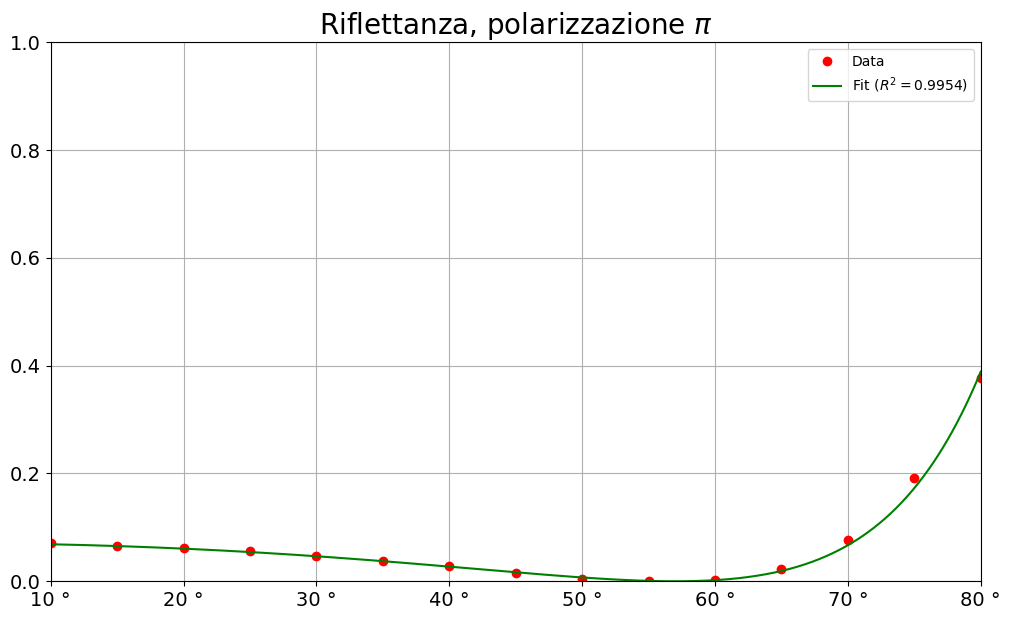

In [6]:
# Cella per il fit dei dati
# Definizione dei bounds
n_min, n_max = 1, 2
t_min, t_max = -5, 5
min, max = [n_min, t_min], [n_max, t_max]
bounds = [min, max]

# Conversione dell'angolo in radianti per i calcoli
theta_rad = np.deg2rad(theta[2:])
ndata = len(theta_rad)          #numero di dati analizzati

# Si effettua ora il fit non lineare per i parametri n e theta_0
popt, pcov = sop.curve_fit(reflectance_2_faces_P, theta_rad, R_P, bounds=bounds)
n = popt[0]
theta_0 = popt[1]

# Si calcola la deviazione standard
sigma = np.sqrt(ndata*np.diag(pcov))
r_sq = r_squared(R_P, reflectance_2_faces_P(theta_rad, n, theta_0))

print('Valore fittato per n=', "{:.3g}".format(n), 'deviazione standard=',"{:.3g}".format(sigma[0]))
print('Valore fittato per theta_0=', "{:.3g}".format(np.rad2deg(theta_0)), 'deviazione standard=',"{:.3g}".format(np.rad2deg(sigma[1])))
print("R^2 = ", "{:.5g}".format(r_sq))

# Si fa ora il plot dei risultati: si visualizzeranno come punti i dati sperimentali, mentre come linea la funzione fittata
fig, ax = plt.subplots(1, 1, figsize=[12,7])

ax.set_title('Riflettanza, polarizzazione $\pi$', size=titlefontsize)
ax.plot(theta[2:], R_P, 'o', markersize=markersize, linewidth=linewidth, color='red', label="Data")
theta_fit = np.linspace(theta_rad[0], theta_rad[-1], num=1000)
ax.plot(np.rad2deg(theta_fit), reflectance_2_faces_P(theta_fit, n, theta_0), '-', markersize=markersize, linewidth=linewidth, color='green', label="Fit ($R^2=${:.4f})".format(r_sq))
ax.xaxis.set_major_formatter(EngFormatter(unit=u"°"))
ax.set_xlim(10,80)
ax.set_ylim(0,1)
ax.tick_params(labelsize=tickfontsize)
ax.grid(True)
ax.legend()

# Si stima ora l'angolo di Brewster prendendo il minimo della funzione fittata
ang_brew = np.rad2deg(theta_fit[reflectance_2_faces_P(theta_fit, n, theta_0).argmin()])
print("L'angolo di Brewster stimato è: {:.2f} gradi".format(ang_brew))

Il valore trovato per l'indice di rifrazione del vetro è quindi $n = 1.46 \pm 0.05$, coerente quindi col valore previsto. Dalla funzione fittata, l'angolo di Brewster è stimato a circa $57\degree$.

## Silicio
Si procede analogamente a ciò fatto per il vetro con il silicio. Le uniche differenze sostanziali sono che:
* Si avranno solo i dati in riflessione, dato che il silicio alla lunghezza d'onda utilizzata non trasmette
* Si userà la formula di Fresnel per la riflessione su una singola faccia, dato che non viene trasmesso praticamente nulla nel mezzo
$$R_{\pi} = \left[ \frac{ n^2 \cos\left(\vartheta_i + \vartheta_0\right) - \sqrt{ n^2 - \sin^2 \left(\vartheta_i + \vartheta_0\right)} }{n^2 \cos\left(\vartheta_i + \vartheta_0\right) + \sqrt{ n^2 - \sin^2 \left(\vartheta_i + \vartheta_0\right)}} \right]^2$$

In [7]:
# Cella per la visualizzazione dei dati
data = pd.read_csv("data/Silicio.csv", delimiter=";")
print(data)

theta_Si = data["theta"].to_numpy()[1:]
V_rifl_S_Si = data["R_S"].to_numpy()[:-1]
V_rifl_P_Si = data["R_P"].to_numpy()

    theta   R_S   R_P
0     NaN  67.7  68.4
1    10.0  19.9  19.4
2    15.0  20.7  19.3
3    20.0  21.3  18.9
4    25.0  22.5  18.4
5    30.0  23.8  17.8
6    35.0  25.5  17.0
7    40.0  27.3  15.8
8    45.0  29.6  14.3
9    50.0  32.3  12.6
10   55.0  35.3  10.3
11   60.0  38.4   7.5
12   65.0  42.3   4.5
13   70.0  46.2   1.8
14   75.0  50.6   0.2
15   80.0  54.9   1.6
16   85.0   NaN  13.7


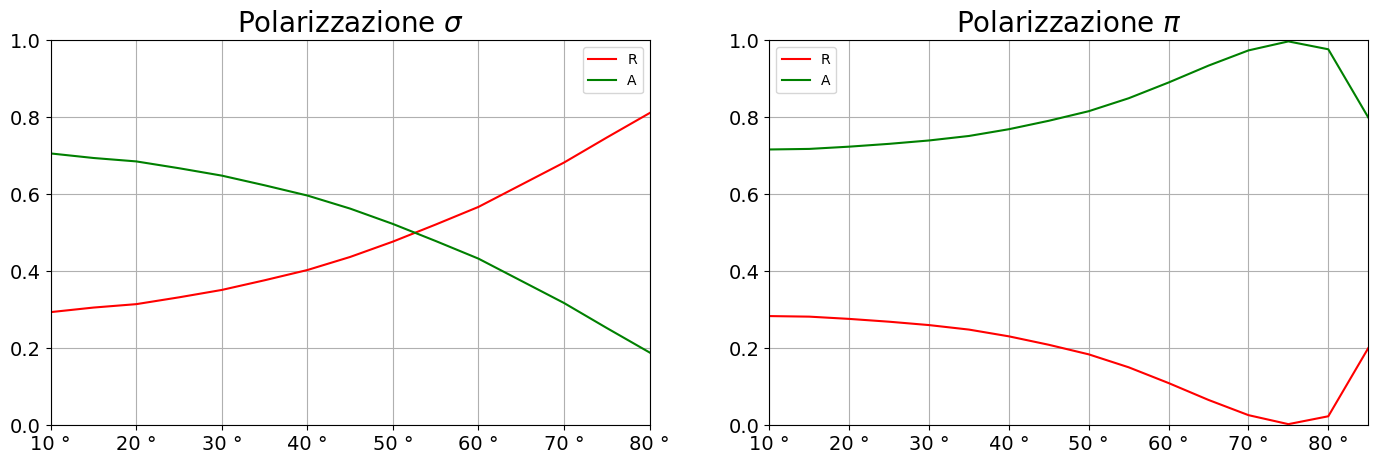

In [8]:
# In questa cella si ricavano R_S e R_P e si effettuano i plot dei dati raccolti
R_S_Si = V_rifl_S_Si[1:]/V_rifl_S_Si[0]
R_P_Si = V_rifl_P_Si[1:]/V_rifl_P_Si[0]

#Calcolo dell'assorbimento
A_P_Si = 1 - R_P_Si
A_S_Si = 1 - R_S_Si

# Si procede ai plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[17,5])

ax1.set_title('Polarizzazione $\sigma$', size=titlefontsize)
ax1.plot(theta_Si[:-1], R_S_Si, '-', markersize=markersize, linewidth=linewidth, color='red', label="R")
ax1.plot(theta_Si[:-1], A_S_Si, '-', markersize=markersize, linewidth=linewidth, color='green', label="A")
ax1.xaxis.set_major_formatter(EngFormatter(unit=u"°"))
ax1.set_xlim(10,80)
ax1.set_ylim(0,1)
ax1.grid(True)
ax1.tick_params(labelsize=tickfontsize)
ax1.legend()

ax2.set_title('Polarizzazione $\pi$', size=titlefontsize)
ax2.plot(theta_Si, R_P_Si, '-', markersize=markersize, linewidth=linewidth, color='red', label="R")
ax2.plot(theta_Si, A_P_Si, '-', markersize=markersize, linewidth=linewidth, color='green', label="A")
ax2.xaxis.set_major_formatter(EngFormatter(unit=u"°"))
ax2.set_xlim(10,85)
ax2.set_ylim(0,1)
ax2.grid(True)
ax2.tick_params(labelsize=tickfontsize)
ax2.legend();

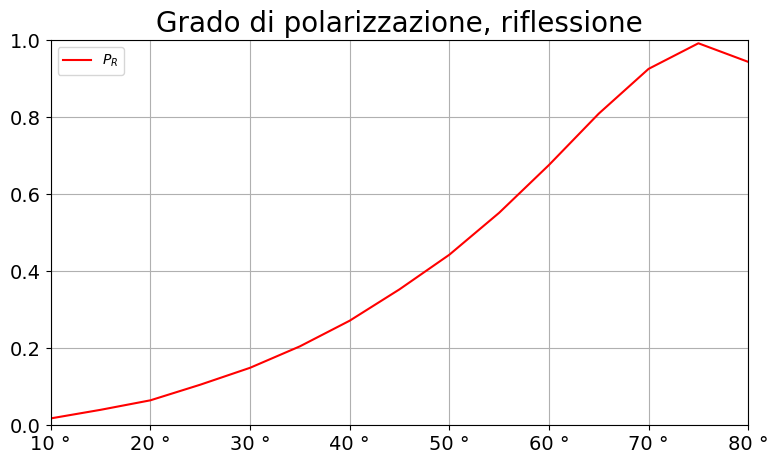

In [9]:
# In questa cella si procede al calcolo e al plot del grado di polarizzazione della riflessione, in maniera analoga al caso precedente
fig, ax = plt.subplots(1, 1, figsize=[9,5])

# Si toglie l'ultimo dato da R_P dato che non si ha il corrispondente per R_S
P_R_Si = np.abs((R_S_Si - R_P_Si[:-1]) / (R_S_Si + R_P_Si[:-1]))

ax.set_title('Grado di polarizzazione, riflessione', size=titlefontsize)
ax.plot(theta_Si[:-1], P_R_Si, '-', markersize=markersize, linewidth=linewidth, color='red', label="$P_R$")
ax.xaxis.set_major_formatter(EngFormatter(unit=u"°"))
ax.set_xlim(10,80)
ax.set_ylim(0,1)
ax.grid(True)
ax.tick_params(labelsize=tickfontsize)
ax.legend();

In [10]:
# Si definisce la nuova funzione di fit da utilizzare
def R_P_Fresnel(theta, n, theta_0):
     return ( ( n**2 * np.cos(theta+theta_0) - np.sqrt( n**2 - np.sin(theta+theta_0)**2 ) ) / ( n**2 * np.cos(theta+theta_0) + np.sqrt( n**2 - np.sin(theta+theta_0)**2 ) ) )**2

Valore fittato per n= 3.52 deviazione standard= 0.187
Valore fittato per theta_0= -1.17 deviazione standard= 1.07
R^2 =  0.98134
L'angolo di Brewster stimato è: 75.32 gradi


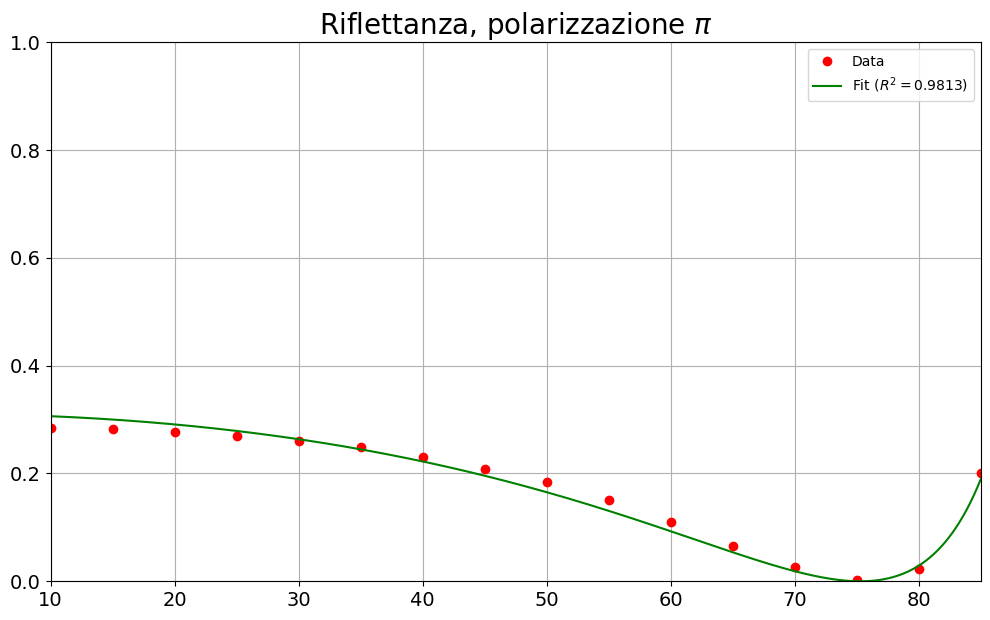

In [11]:
# In questa cella si procederà con il fit e la stima dei risultati
# Definizione dei bounds
n_min, n_max = 1, 5
t_min, t_max = -5, 5
min, max = [n_min, t_min], [n_max, t_max]
bounds = [min, max]

# Conversione dell'angolo in radianti per i calcoli
theta_rad_Si = np.deg2rad(theta_Si)
ndata = len(theta_rad_Si)          #numero di dati analizzati

# Si effettua ora il fit non lineare per i parametri n e theta_0
# Questa volta con la funzione di fit R_P_Fresnel
popt, pcov = sop.curve_fit(R_P_Fresnel, theta_rad_Si, R_P_Si, bounds=bounds)
n = popt[0]
theta_0 = popt[1]

# Si calcola la deviazione standard
sigma = np.sqrt(ndata*np.diag(pcov))
r_sq = r_squared(R_P_Si, R_P_Fresnel(theta_rad_Si, n, theta_0))

print('Valore fittato per n=', "{:.3g}".format(n), 'deviazione standard=',"{:.3g}".format(sigma[0]))
print('Valore fittato per theta_0=', "{:.3g}".format(np.rad2deg(theta_0)), 'deviazione standard=',"{:.3g}".format(np.rad2deg(sigma[1])))
print("R^2 = ", "{:.5g}".format(r_sq))

# Si fa ora il plot dei risultati: si visualizzeranno come punti i dati sperimentali, mentre come linea la funzione fittata
fig, ax = plt.subplots(1, 1, figsize=[12,7])

ax.set_title('Riflettanza, polarizzazione $\pi$', size=titlefontsize)
ax.plot(theta_Si, R_P_Si, 'o', markersize=markersize, linewidth=linewidth, color='red', label="Data")
theta_fit = np.linspace(theta_rad_Si[0], theta_rad_Si[-1], num=1000)
ax.plot(np.rad2deg(theta_fit), R_P_Fresnel(theta_fit, n, theta_0), '-', markersize=markersize, linewidth=linewidth, color='green', label="Fit ($R^2=${:.4f})".format(r_sq))
ax.set_xlim(10,85)
ax.set_ylim(0,1)
ax.tick_params(labelsize=tickfontsize)
ax.grid(True)
ax.legend()

# Si stima ora l'angolo di Brewster prendendo il minimo della funzione fittata
ang_brew = np.rad2deg(theta_fit[reflectance_2_faces_P(theta_fit, n, theta_0).argmin()])
print("L'angolo di Brewster stimato è: {:.2f} gradi".format(ang_brew))

In questo caso il valore dell'indice di rifrazione trovato è $n = 3.52 \pm 0.187$, leggermente più basso di quello che ci si aspetterebbe di trovare. Questo può essere dato da tanti fattori, tra cui un fit più impreciso (quindi una funzione di fit non accurata a descrivere la situazione reale) oltre che a possibili errori sperimentali nella collimazione del fascio.
Si può ottenere un valore leggermente migliore utilizzando l'angolo di Brewster:
$$\tan\phi_B = \frac{n}{n_0} = n$$
dove $\phi_B$ è l'angolo di Brewster e $n_0 = 1$ l'indice di rifrazione dell'aria. Dal valore trovato di $\phi_B$ si trova che:
$$\tan \left(75.32\degree\right) \approx 3.82$$
che è più vicino al valore di $n$ che ci si aspetta.

## Oro
In questo caso si plotteranno soltanto i dati ottenuti senza fare stime perché, date le dimensioni ridotte del campione, non si è riusciti ad arrivare ad angoli tali da consentire l'individuazione dell'angolo di pseudo-Brewster.
Si procede in maniera analoga ai casi precedenti.


In [12]:
# Cella per la visualizzazione dei dati
data = pd.read_csv("data/Oro.csv", delimiter=";")
print(data)

theta_Au = data["theta"].to_numpy()[1:]
V_rifl_S_Au = data["R_S"].to_numpy()[:-3]
V_rifl_P_Au = data["R_P"].to_numpy()

    theta   R_S   R_P
0     NaN  63.6  62.8
1    10.0  49.9  51.8
2    15.0  50.4  51.4
3    20.0  51.0  51.6
4    25.0  51.4  51.6
5    30.0  52.7  51.8
6    35.0  53.5  52.1
7    40.0  55.2  52.2
8    45.0  56.4  52.2
9    50.0  57.7  52.0
10   55.0  58.8  52.0
11   60.0  59.6  51.7
12   65.0   NaN  49.0
13   70.0   NaN  44.5
14   75.0   NaN  35.7


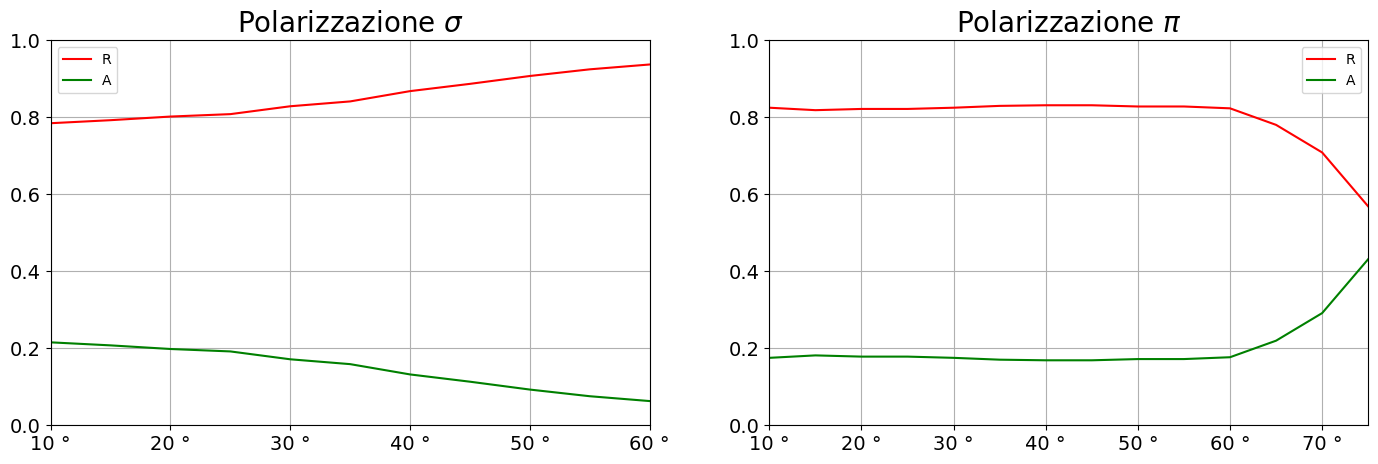

In [13]:
# In questa cella si ricavano R_S e R_P e si effettuano i plot dei dati raccolti
R_S_Au = V_rifl_S_Au[1:]/V_rifl_S_Au[0]
R_P_Au = V_rifl_P_Au[1:]/V_rifl_P_Au[0]

#Calcolo dell'assorbimento
A_P_Au = 1 - R_P_Au
A_S_Au = 1 - R_S_Au

# Si procede ai plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[17,5])

ax1.set_title('Polarizzazione $\sigma$', size=titlefontsize)
ax1.plot(theta_Au[:-3], R_S_Au, '-', markersize=markersize, linewidth=linewidth, color='red', label="R")
ax1.plot(theta_Au[:-3], A_S_Au, '-', markersize=markersize, linewidth=linewidth, color='green', label="A")
ax1.xaxis.set_major_formatter(EngFormatter(unit=u"°"))
ax1.set_xlim(10,60)
ax1.set_ylim(0,1)
ax1.grid(True)
ax1.tick_params(labelsize=tickfontsize)
ax1.legend()

ax2.set_title('Polarizzazione $\pi$', size=titlefontsize)
ax2.plot(theta_Au, R_P_Au, '-', markersize=markersize, linewidth=linewidth, color='red', label="R")
ax2.plot(theta_Au, A_P_Au, '-', markersize=markersize, linewidth=linewidth, color='green', label="A")
ax2.xaxis.set_major_formatter(EngFormatter(unit=u"°"))
ax2.set_xlim(10,75)
ax2.set_ylim(0,1)
ax2.grid(True)
ax2.tick_params(labelsize=tickfontsize)
ax2.legend();

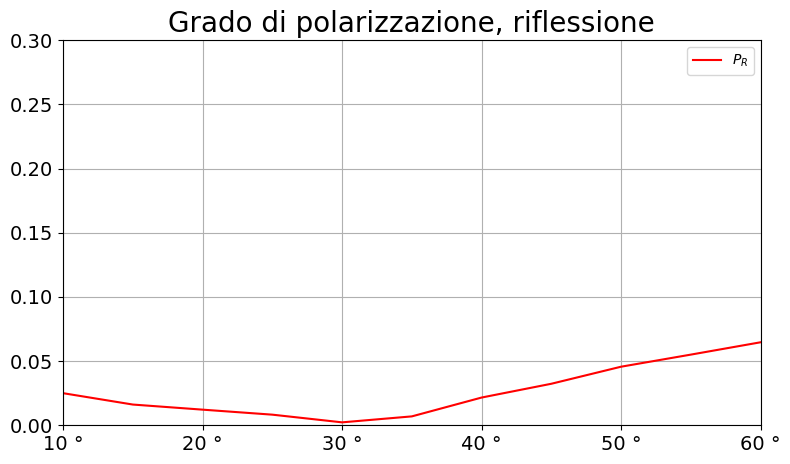

In [14]:
# In questa cella si procede al calcolo e al plot del grado di polarizzazione della riflessione, in maniera analoga al caso precedente
fig, ax = plt.subplots(1, 1, figsize=[9,5])

# Si toglie gli ultimi 3 dati da R_P dato che non si ha il corrispondente per R_S
P_R_Au = np.abs((R_S_Au - R_P_Au[:-3]) / (R_S_Au + R_P_Au[:-3]))

ax.set_title('Grado di polarizzazione, riflessione', size=titlefontsize)
ax.plot(theta_Au[:-3], P_R_Au, '-', markersize=markersize, linewidth=linewidth, color='red', label="$P_R$")
ax.xaxis.set_major_formatter(EngFormatter(unit=u"°"))
ax.set_xlim(10,60)
ax.set_ylim(0,0.3)
ax.grid(True)
ax.tick_params(labelsize=tickfontsize)
ax.legend();

# Spettri
### Struttura dell'esperienza
In questa seconda esperienza si vogliono ricavare le misure dei coefficienti di riflessione e trasmissione di vari materiali sul massimo dello spettro analizzabile (da $\lambda = 400\text{ nm}$ a $\lambda = 850\text{ nm}$).
Come sorgente luminosa si è utilizzata una lampada alogena con lo stesso sistema di focalizzazione dell'esperienza precedente. Il raggio risultante dalla riflessione/trasmissione sul campione si è poi diretto su un reticolo di diffrazione che fungesse da "monocromatore". Muovendo il fotodiodo che si usa come rilevatore lungo una scala tarata si può di ricavare l'intensità luminosa corrispondente a una certa lunghezza d'onda. Questo si verifica perché il reticolo rispetta la legge di Bragg:
$$n\lambda = 2d\sin\vartheta$$
dove $n$ è l'ordine di diffrazione, quindi in questa esperienza $n=1$.

Il monocromatore è stato allineato mediante l'utilizzo di 3 laser a lunghezze d'onda differenti: $405\ \mathrm{nm}$, $532\ \mathrm{nm}$, $637\ \mathrm{nm}$

Di seguito una foto del setup sperimentale in riflessione (fonte: slide del corso).
<br><center><img src="img/LAMP_rifl.png" width="700"/></center><br>


Esattamente come nell'esperienza precedente, il fotodiodo è polarizzato in inversa (questa volta usando una resistenza da $47\text{ k\Omega}$): in questo modo, misurando la tensione si ottiene un valore proporzionale all'intensità ($V \propto I$).

Per tutte le misure effettuate prima si effettua una misura "a vuoto" (senza campione) per ottenere una baseline a tutte le lunghezze d'onda: si otterranno i coefficienti R e T calcolando il rapporto tra il valore di tensione ai capi sul fotodiodo e la baseline, ottenendo quindi un rapporto di intensità (dato che, come detto sopra, $V \propto I$).

I materiali utilizzati sono stati vetro e silicio (quest'ultimo solo in riflessione).

## Dati di riferimento
Di seguito si riportano i plot dei dati di riferimento forniti dall Prof.ssa Patrini, in modo da poter effettuare confronti diretti in seguito.

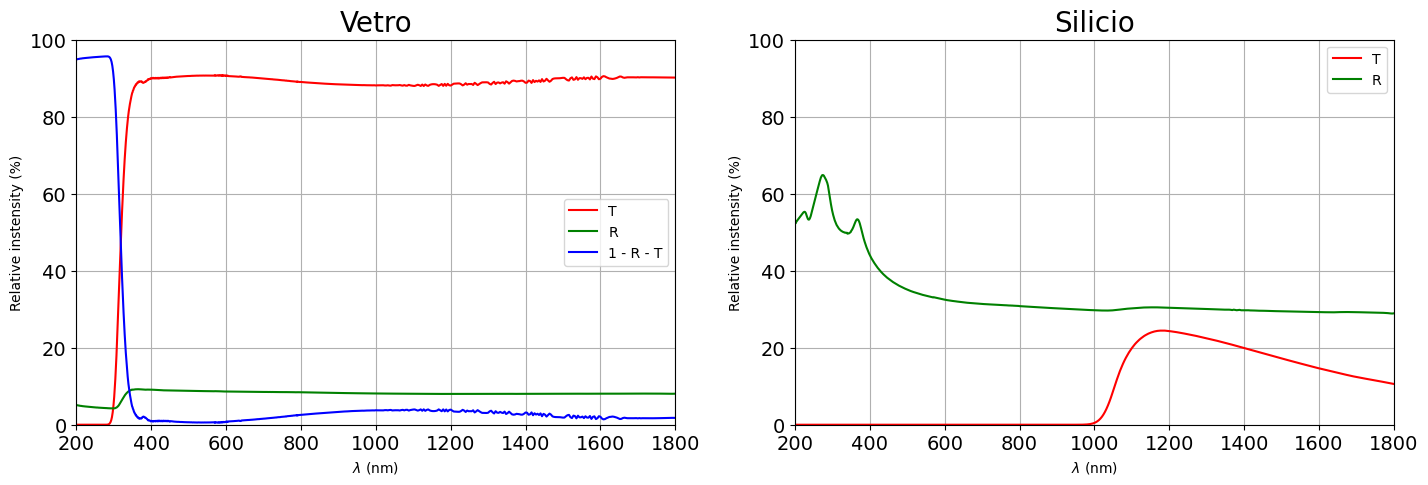

In [15]:
# Cella per la visualizzazione dei dati
data = pd.read_csv("data/RT_Vetro_measured.dat", delimiter="\t")

lambda_ref = data["Wavelength(nm)"].to_numpy()
T_Vetro_Ref = data["T_VETRO"].to_numpy()
R_Vetro_Ref = data["R_VETRO"].to_numpy()

# In questa cella si procede al plot dei dati
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[17,5])

ax1.set_title('Vetro', size=titlefontsize)
ax1.plot(lambda_ref, T_Vetro_Ref, '-', markersize=markersize, linewidth=linewidth, color='red', label="T")
ax1.plot(lambda_ref, R_Vetro_Ref, '-', markersize=markersize, linewidth=linewidth, color='green', label="R")
ax1.plot(lambda_ref, 100 - T_Vetro_Ref - R_Vetro_Ref, '-', markersize=markersize, linewidth=linewidth, color='blue', label="1 - R - T")
ax1.set_xlabel("$\lambda$ (nm)")
ax1.set_ylabel("Relative instensity (%)")
ax1.set_xlim(200,1800)
ax1.set_ylim(0,100)
ax1.grid(True)
ax1.tick_params(labelsize=tickfontsize)
ax1.legend()

data = pd.read_csv("data/RT_Si_measured.dat", delimiter="\t")

lambda_ref = data["Wavelength(nm)"].to_numpy()
T_Si_Ref = data["T_SILICIO"].to_numpy()
R_Si_Ref = data["R_SILICIO"].to_numpy()

ax2.set_title('Silicio', size=titlefontsize)
ax2.plot(lambda_ref, T_Si_Ref, '-', markersize=markersize, linewidth=linewidth, color='red', label="T")
ax2.plot(lambda_ref, R_Si_Ref, '-', markersize=markersize, linewidth=linewidth, color='green', label="R")
ax2.set_xlabel("$\lambda$ (nm)")
ax2.set_ylabel("Relative instensity (%)")
ax2.set_xlim(200,1800)
ax2.set_ylim(0,100)
ax2.grid(True)
ax2.tick_params(labelsize=tickfontsize)
ax2.legend();

## Vetro
Di seguito si riportano i plot dei dati per il campione di vetro. Per prima cosa si plotta un esempio di baseline (sono diverse per le due misure dato che sono state effettuate in giorni differenti).
Dopo la baseline, si procederà a plottare un grafico equivalente a quello sopra, seguito da paragoni separati per R e T.

In [16]:
# Cella per la lettura dei dati da file
data = pd.read_csv("data/spectrum.csv", delimiter=";")

lambda_ = data["lambda"].to_numpy()
baseline_vetro_T = data["Base_V_T"].to_numpy()
vetro_T = data["Vetro_T"].to_numpy()
baseline_vetro_R = data["Base_V_R"].to_numpy()
vetro_R = data["Vetro_R"].to_numpy()
baseline_Si = data["Base_Si"].to_numpy()
si_R = data["Si_R"].to_numpy()

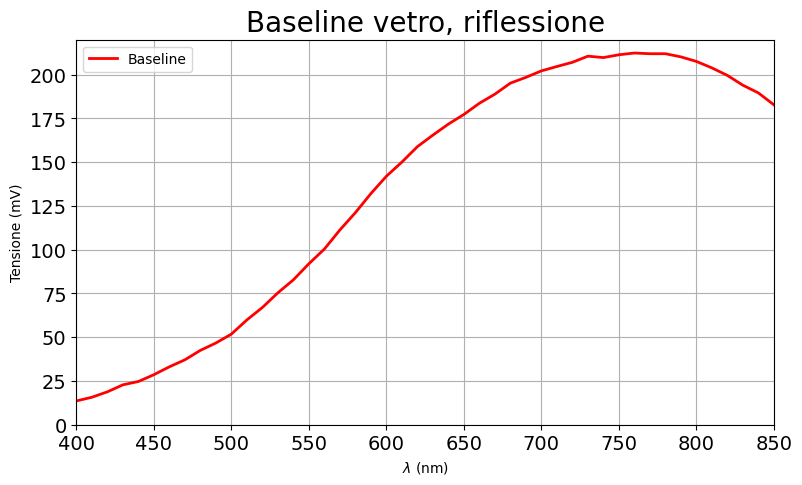

In [17]:
# Si usa questa cella per plottare una baseline di esempio
fig, ax = plt.subplots(1, 1, figsize=[9,5])

ax.set_title('Baseline vetro, riflessione', size=titlefontsize)
ax.plot(lambda_, baseline_vetro_R, '-', markersize=markersize, linewidth=linewidth+0.5, color='red', label="Baseline")
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("Tensione (mV)")
ax.set_xlim(400,850)
ax.set_ylim(0,220)
ax.grid(True)
ax.tick_params(labelsize=tickfontsize)
ax.legend();

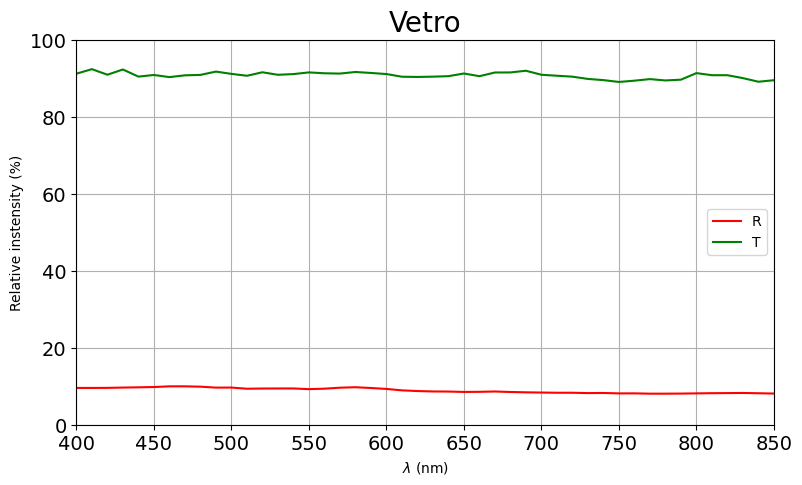

In [18]:
# Si usa questa cella per plottare i dati
fig, ax = plt.subplots(1, 1, figsize=[9,5])

R_Vetro = vetro_R/baseline_vetro_R * 100
T_Vetro = vetro_T/baseline_vetro_T * 100

ax.set_title('Vetro', size=titlefontsize)
ax.plot(lambda_, R_Vetro, '-', markersize=markersize, linewidth=linewidth, color='red', label="R")
ax.plot(lambda_, T_Vetro, '-', markersize=markersize, linewidth=linewidth, color='green', label="T")
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("Relative instensity (%)")
ax.set_xlim(400,850)
ax.set_ylim(0,100)
ax.grid(True)
ax.tick_params(labelsize=tickfontsize)
ax.legend();

Si può osservare una riflessione intorno al 10% e una trasmissione intorno al 90%. Si plotta ora il confronto con i dati forniti.

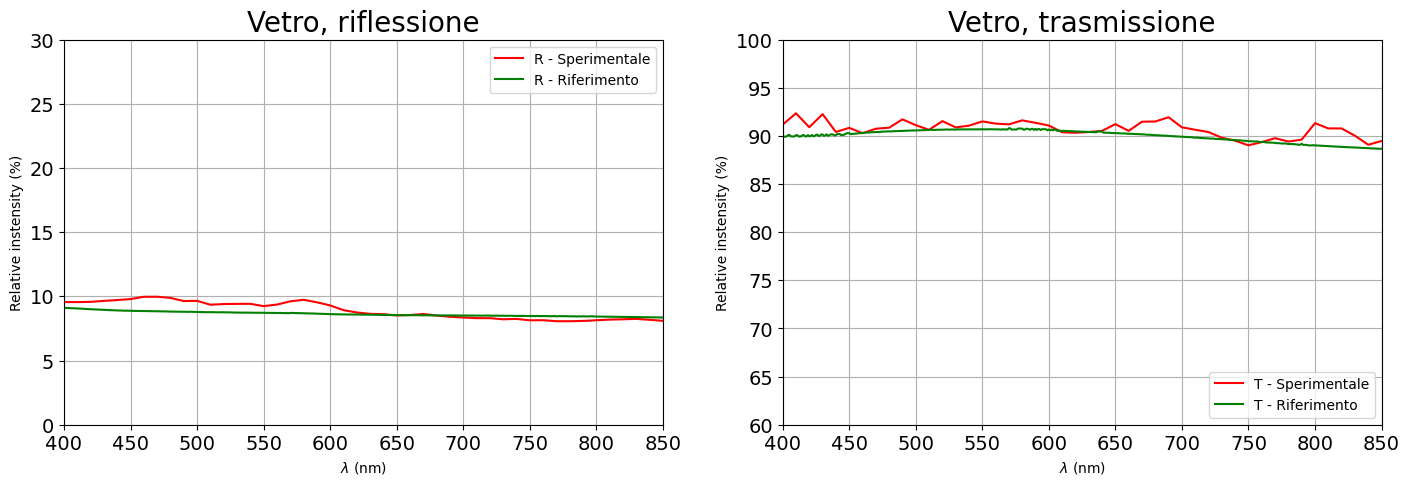

In [28]:
# In questa cella si procede al plot del confronto tra dati sperimentali e dati forniti
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[17,5])

# Indici per selezionare solo le lunghezze d'onda necessarie per il confronto
ind = [np.where(lambda_ref == 400)[0][0], np.where(lambda_ref == 852)[0][0]]
ax1.set_title('Vetro, riflessione', size=titlefontsize)
ax1.plot(lambda_, R_Vetro, '-', markersize=markersize, linewidth=linewidth, color='red', label="R - Sperimentale")
ax1.plot(lambda_ref[ind[1]:ind[0]], R_Vetro_Ref[ind[1]:ind[0]], '-', markersize=markersize, linewidth=linewidth, color='green', label="R - Riferimento")
ax1.set_xlabel("$\lambda$ (nm)")
ax1.set_ylabel("Relative instensity (%)")
ax1.set_xlim(400,850)
ax1.set_ylim(0,30)
ax1.grid(True)
ax1.tick_params(labelsize=tickfontsize)
ax1.legend()

ax2.set_title('Vetro, trasmissione', size=titlefontsize)
ax2.plot(lambda_, T_Vetro, '-', markersize=markersize, linewidth=linewidth, color='red', label="T - Sperimentale")
ax2.plot(lambda_ref[ind[1]:ind[0]], T_Vetro_Ref[ind[1]:ind[0]], '-', markersize=markersize, linewidth=linewidth, color='green', label="T - Riferimento")
ax2.set_xlabel("$\lambda$ (nm)")
ax2.set_ylabel("Relative instensity (%)")
ax2.set_xlim(400,850)
ax2.set_ylim(60,100)
ax2.grid(True)
ax2.tick_params(labelsize=tickfontsize)
ax2.legend(loc='lower right');

Le osservazioni principali da fare su questo confronto sono due:
* I dati presentano un accordo abbastanza buono, variando solo di qualche punto percentuale rispetto al valore previsto.
* I dati sperimentali sono molto più rumorosi: questo è imputabile al fatto che i dati misurati con l'attrezzatura disponibile a noi studenti sono strutturalmente soggetti a piccole fluttuazioni, sia a causa delle numerose fonti di errore sia a causa del lieve cambiamento della situazione circostante nel corso della misura. La misura in trasmissione, più rumorosa della riflessione, è una misura che è stata particolarmente ostica, rendendo necessario riprenderla tre volte, principalmente a causa del cambiamento delle condizioni dell'ambiente circostante.

Nel complesso le misure presentano un buon accordo con i dati di riferimento, quindi ci si può ritenere soddisfatti degli esiti della misura.

## Silicio
Si procede in maniera analoga al vetro, con l'unica differenza che si avranno soltanto dati in trasmissione. Dato che il plot è uno solo, si procede col graficare direttamente il plot di confronto.

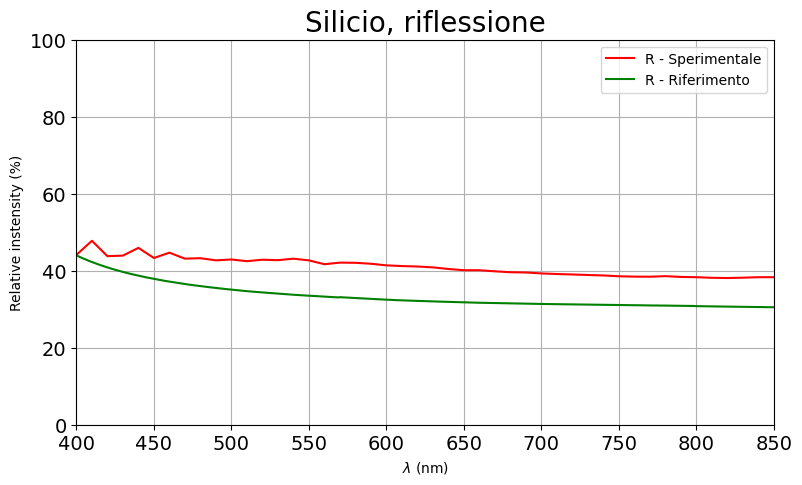

In [29]:
# Si usa questa cella per plottare i dati
fig, ax = plt.subplots(1, 1, figsize=[9,5])

R_Silicio = si_R/baseline_Si* 100

ax.set_title('Silicio, riflessione', size=titlefontsize)
ax.plot(lambda_, R_Silicio, '-', markersize=markersize, linewidth=linewidth, color='red', label="R - Sperimentale")
ax.plot(lambda_ref[ind[1]:ind[0]], R_Si_Ref[ind[1]:ind[0]], '-', markersize=markersize, linewidth=linewidth, color='green', label="R - Riferimento")
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("Relative instensity (%)")
ax.set_xlim(400,850)
ax.set_ylim(0,100)
ax.grid(True)
ax.tick_params(labelsize=tickfontsize)
ax.legend();

In questa misura si può notare una partenza simile (nell'andamento), ma una decrescita molto meno marcata all'aumentare della lunghezza d'onda.
Le ragioni dietro questa discrepanza possono essere molteplici:
* Errori nella misurazione della baseline
* Errori dovuti alla difficoltà della misura
* Errori sistematici sull'apparato di misura

# Spettro di multistrati DBR
L'obiettivo di questa esperienza è misurare gli spettri di trasmittanza e riflettanza di un multistrato DBR (Distributed Bragg Reflectors).
Il setup sperimentale e molto simile a quello dell'esperienza precedente, in particolare:
* come sorgente luminosa si è utilizzata sempre una lampada alogena, come rilevatore un fotodiodo in inversa con una resistenza da $47 \text{ k\Omega}$ in modo che $V \propto I$ con $I$ intensità)
* si è utilizzato sempre un insieme di lenti per la focalizzazione e la collimazione del fascio della lampada

Analogamente all'esperienza precedente, si è dapprima raccolta la baseline "a vuoto" per normalizzare le misure successive, poi si è passati alle misure vere e proprie.

Di seguito si riportano i dati e il plot risultante di riflettanza e trasmittanza.

In [21]:
# Cella per la lettura dei dati da file
data = pd.read_csv("data/DBR.csv", delimiter=";")

lambda_ = data["lambda"].to_numpy()
baseline_DBR = data["baseline"].to_numpy()
DBR_T = data["T"].to_numpy()
DBR_R = data["R"].to_numpy()

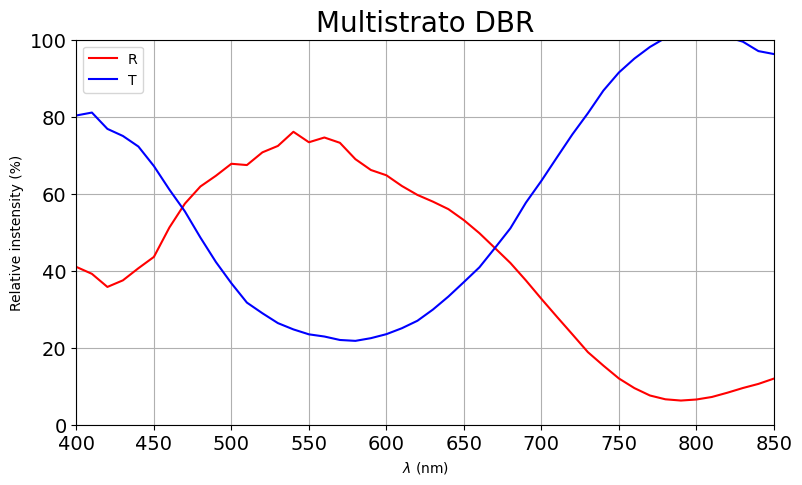

In [22]:
# Si usa questa cella per plottare i dati di riflettanza e trasmittanza
fig, ax = plt.subplots(1, 1, figsize=[9,5])

R_DBR = DBR_R/baseline_DBR * 100
T_DBR = DBR_T/baseline_DBR * 100

ax.set_title('Multistrato DBR', size=titlefontsize)
ax.plot(lambda_, R_DBR, '-', markersize=markersize, linewidth=linewidth, color='red', label="R")
ax.plot(lambda_, T_DBR, '-', markersize=markersize, linewidth=linewidth, color='blue', label="T")
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("Relative instensity (%)")
ax.set_xlim(400,850)
ax.set_ylim(0,100)
ax.grid(True)
ax.tick_params(labelsize=tickfontsize)
ax.legend();

Al netto di un leggero rumore sperimentale, si vede bene la regione di filtraggio della radiazione: tra $\sim500 \text{ nm}$ e $\sim650 \text{ nm}$ la trasmittanza è ai valori minimi, mentre la riflettanza risulta più alta, quindi la maggior parte della radiazione viene riflessa.